# *A Study on Bike Sharing Data Analysis, Demand Prediction and Incentive Scheme Design*
# 0. Introduction
## Background
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. There are generally two kinds of bike sharing services:
- docking station based bike sharing, where one has to rent and return the bikes at fixed positions;
- free-floating, dockless bike-sharing services, which became possible with the prevalence of smartphones and cashless mobile payment. In 2015, two start-up companies, Ofo and Mobike, initiated an innovative generation of fully dockless bike-sharing services in China.    

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. 

![bike-sharing-singapore](../img/bike-sharing-singapore.jpg)

In this notebook, I use a [public bike sharing dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset) on UCI machine learning repository, which contains two-year historical log corresponding to years 2011 and 2012, contributed by [*Capital Bikeshare*](https://www.capitalbikeshare.com/) in Washington, D.C.

Note that there was also a [Kaggle competition](https://www.kaggle.com/c/bike-sharing-demand) using this dataset three years ago. In that competition, the only aim is to make predictions for bike sharing demand, where the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. However, in this project, I simply split the data into a training set and a test set randomly.

## Objective

The main purpose of this project is to **learn and practice data analysis, data visualization and machine learning modeling** using Python and related packages including *numpy*, *pandas*, *seaborn* and *matplotlib* etc. I choose this dataset because it involves multiple features, including both categorical and continuous ones, and it is closely related with our daily life since we are  all familiar with bike sharing nowadays.   
Specifically, regarding this dataset, I want to address the following concerns using exploratory data analysis (EDA) and machine learning techniques:
- reveal **the most important factors** that affect the count of total rental bikes.
- build a **predictive model** for bike rental demand estimation by mining the pattern in the dataset
- develop some well-designed, targeted **incentive schemes** to promote bike sharing, which can be monetary or non-monetary.

## Organization
There are 6 sections in the remainder of this notebook and they are organized as follows. First the necessary packages for Python data analysis are imported and the dataset are read from the .csv files. Then, we get a first impression of the data by checking the data types of each attribute and the overall statistics. Next, the data are first cleaned and we perform exploratory data analysis (EDA) with various visualization tools. Following the observations in EDA, simple feature engineering is conducted and the random forest regression model is adopted for bike rental demand prediction. Finally, a brief conclusion is drawn and possible incentive methods are conceived. 

# 1. Import necessary packages and read data
## Import packages, define utility function and configure matplotlib basic styles

In [1]:
# computation
import numpy as np
import pandas as pd
# visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# utility
import os.path
from datetime import datetime

In [2]:
# IPython-specific utilities
from IPython.display import Markdown, display

def printmd(string):
    """Print the string in markdown style"""
    display(Markdown(string))

** Configure `matplotlib` style **

In [3]:
# matplotlib.rcParams is just a dictionary-like object to change default matplotlib settings.
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 20

## Read data
There are two files in the dataset: *hour.csv* and *day.csv*. Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [4]:
data_dir = '../data'

In [5]:
day_data = pd.read_csv(os.path.join(data_dir, 'raw', 'day.csv'), parse_dates=['dteday'])
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_data = pd.read_csv(os.path.join(data_dir, 'raw', 'hour.csv'), parse_dates=['dteday'])
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


*Note*: it seems that data in *day.csv* are mainly provided for convenience, because we can compute it from *hour.csv* directly. Therefore, in the following analysis, most of the time I will use *hour.csv* solely.

# 2. Summary of the dataset: get to know the data
Before any decent analysis of the data, we need to first get a bird's-eye view of the data. To name a few, what are the attributes (features)? What are their meaning? What are the types of the features? How many records do we have?  

### Day data

In [7]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null datetime64[ns]
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(11)
memory usage: 91.5 KB


In [8]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Hour data

In [9]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null datetime64[ns]
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(12)
memory usage: 2.3 MB


We see that:
+ There are 17 columns in each dataset, and 15 features (predictors) and 1 response variable, excluding the `instant` column.
+ The `dteday` column is in `datetime` column, and all others are numeric types.
+ 731 observations in `day_data` and 17379 observations in `hour_data`. There should be 24 hourly records for each day, while $731 * 24 = 17544$. Thus, there must be some observations missing in the `hour_data`. Since the number of missing observations in `hour_data` is small, it should not has much influence on our analysis.
+ As for the rental count represented by `cnt`, we see that its daily average is 4504 with a very large standard deviation 1937. It is reasonable to suspect that there are large fluctuations in daily rental count over the whole year.

# 3. Data cleaning: identify quality issues in the dataset
After we have a summary of the data, the next step is to clean the data, i.e., to identify and handle data quality issues [1]. Regarding data cleaning and data exploration, an excellent reference is Chapter 3 of the book [1]. 

In this section, two possible issues are investigated, including *missing values* and *outliers*.

## Missing values
Missing values are usually represented by NaN in a `pandas.DataFrame`. We can use `pandas.DataFrame.isnull` to check whether an entry is NaN.

In [10]:
# count how many null (NaN) values in each column
day_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
hour_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Summary**  
There are no missing values in the two datasets.

## Outliers
Outliers are values that lie far away from the central tendency of a feature [1]. There are two kinds of outliers: invalid outliers and valid outliers. Valid outliers are correct values that are simply very different from the rest of the values for a feature, but are not wrong themselves.  
There is no easy way to determine whether an outlier is whether valid or not. In this section, 
- for categorical variable, like `season` and `holiday`, we just check their distinct values to see whether they are legal according to the definition; 
- on the other hand, for continuous numeric attributes, like `cnt`, a box plot is a good tool to visualize their distribution and to pinpoint possible outliers.

In the following, we will take the `hour_data` dataset for example, since the procedures are identical for the other dataset. As aformentioned, `hour_data` is the key dataset since it can provide more information. 

### Categorical features

In [12]:
categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
printmd('**Anaylize categorical features of `hour_data`**')
for f in categorical_features:
    print(f'Unique values of {f}: ')
    print(hour_data[f].unique())

**Anaylize categorical features of `hour_data`**

Unique values of season: 
[1 2 3 4]
Unique values of yr: 
[0 1]
Unique values of mnth: 
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values of hr: 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique values of holiday: 
[0 1]
Unique values of weekday: 
[6 0 1 2 3 4 5]
Unique values of workingday: 
[0 1]
Unique values of weathersit: 
[1 2 3 4]


In [13]:
# are all dates in range [1/1/2011, 12/31/2012]?
start = pd.Timestamp('2011-1-1')
end = pd.Timestamp('2012-12-31')
is_in_range = (hour_data['dteday'] >= start) & (hour_data['dteday'] <= end)  # & is used to combine Boolean elementwisely
print("All in range? ", is_in_range.all())

All in range?  True


** Summary **  
There should be no outliers in the above categorical features of `hour_data` according to their values simply since all the categorical values are valid. However, we may find abnormal records as the analysis goes further, which is shown next.

### Continuous features
We draw a boxplot for each continuous feature in `hour_data` to get a visual conception of its distribution.

**Knowledge about boxplot and outliers**

*Outlier is a value that lies in a data series on its extremes*, which is either very small or large and thus can affect the overall observation made from the data series. For continuous values, a boxplot is commonly used to identify possible outliers. A convenient definition of an outlier is a point which falls more than 1.5 times the interquartile range (IQR) above the third quartile or below the first quartile. The figure below illustrates the anatomy of a boxplot ([source](http://www.whatissixsigma.net/box-plot-diagram-to-identify-outliers/)). 

![boxplot](../img/boxplot.png)

The related definitions are listed as follows.
- The Median (Q2) is the middle value of the data set.
- The Lower quartile (Q1) is the median of the lower half of the data set.
- The Upper quartile (Q3) is the median of the upper half of the data set.
- The Interquartile range (IQR) is the spread of the middle 50% of the data values, defined by $IQR=Q_3 - Q_1$.

Usually, the values of $Q_1 - 1.5IQR$ and $Q_3 + 1.5IQR$ are also called *whiskers*, as used in [`seaborn.boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html).
#### `temp`, `hum` and `windspeed`

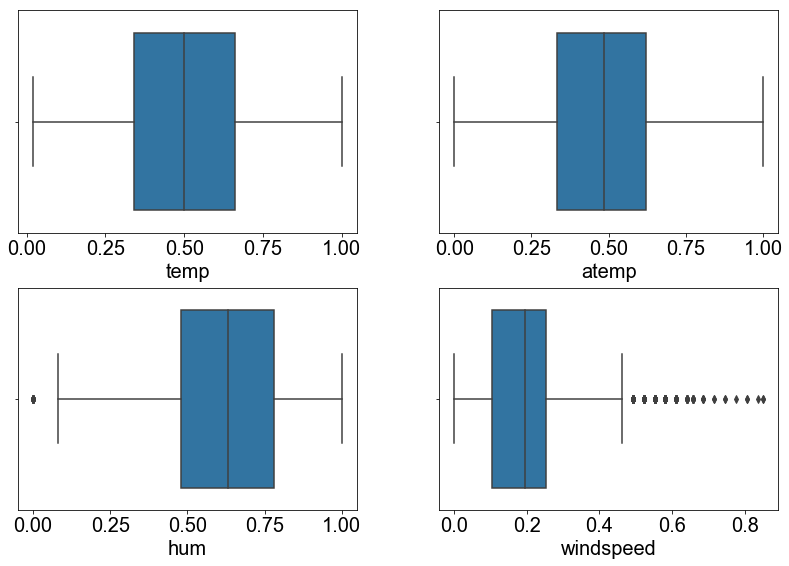

In [14]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 8)
fig.tight_layout()
sns.boxplot(data=hour_data,y="temp",orient="h",ax=axes[0][0])
sns.boxplot(data=hour_data,y="atemp",orient="h",ax=axes[0][1])
sns.boxplot(data=hour_data,y="hum",orient="h",ax=axes[1][0])
sns.boxplot(data=hour_data,y="windspeed",orient="h",ax=axes[1][1])

From the above four figures, we see that there are possible outliers in the `windspeed` and `hum` features according to the quartile criteria [1], i.e., outside 1.5 times the interquartile range above the upper quartile and bellow the lower quartile.

#### Remove outliers from `hum`
The easiest way to handle outliers is to use a clamp transformation. That is, remove values above an upper threshold or below a lower threshod. Obviously here, we'd better treat records with `hum`=0 as outliers. 

In [15]:
outlier_filter = hour_data['hum'] == 0
count_outliers = outlier_filter.sum()
print(f"How many outliers with hum=0? ", count_outliers)

How many outliers with hum=0?  22


In [16]:
# remove the hum outliers, whose values are actually all equal to 0.
hour_data = hour_data[~outlier_filter]
hour_data.shape

(17357, 17)

#### `casual`, `registered` and `cnt`

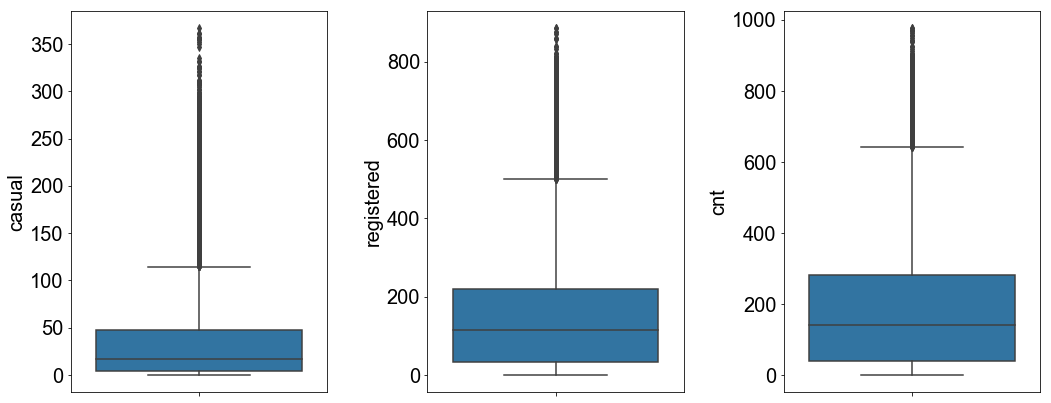

In [17]:
fig = plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=hour_data,y="casual",orient="v")
plt.subplot(1, 3, 2)
sns.boxplot(data=hour_data,y="registered",orient="v")
plt.subplot(1, 3, 3)
sns.boxplot(data=hour_data,y="cnt",orient="v")
fig.tight_layout()  # adjust layout to avoid overlapping among subplots

It seems there are many overlarge values in `cnt` related columns.  
Similarly, we'll remove the outliers whose values are outside the $Q_3 + 2IQR$ range. Noth here the $2IQR$ instead of $1.5IQR$ criterion is used, because I want to handle this a little more conservatively. 

In [18]:
f = 'cnt'
Q1 = hour_data[f].quantile(0.25)
Q3 = hour_data[f].quantile(0.75)
IQR = Q3 - Q1   # interquartile range
outlier_filter = hour_data[f] > Q3 + 2 * IQR
count_outliers = outlier_filter.sum()
print(f"How many outliers in {f} according to the 2IQR? ", count_outliers)

How many outliers in cnt according to the 2IQR?  196


In [19]:
# remove outliers w.r.t cnt
hour_data = hour_data[~outlier_filter]
hour_data.shape

(17161, 17)

**Summary**  
Now after removing potential outliers from `cnt`, we finally get a dataset of 17161 observations.

In [20]:
# let's drop the instant column since it is just an identifier and has no practical meaning.
hour_data = hour_data.drop('instant', axis=1)

# 4. Data exploration & visualization
We will perform exploratory data analysis (EDA) in this section to mine more hidden knowledge from the data. We first give an overview of the relationship (correlations) among all the attributes. During this prcoess, we may identify which relationships are of particular interet and deserve further investigations. After that, the important pairwise feature relationships are examined.

## Overview of the relationship between each pair of features
Two tools: (1) correlation matrix and (2) scatterplot matrix [1]. Here, I use the correlation matrix and compute the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between each pair of features.

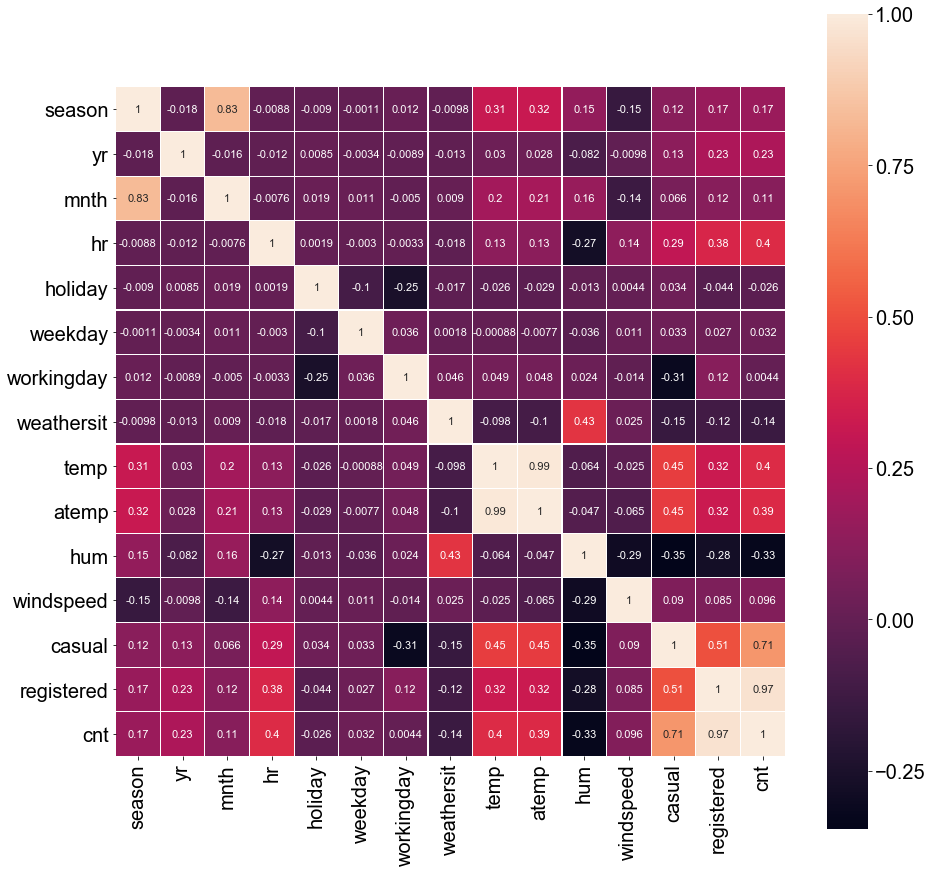

In [21]:
corr_mat = hour_data.corr(method='pearson')
fig = plt.figure(figsize=(15, 15))
sns.heatmap(corr_mat, square=True, annot=True, annot_kws={"size": 11}, linewidths=0.2) # annotation font size is 11

We notice that:  
- `season` and `month`, `temp` and `atemp` are highly correlated, which are reasonable and anticipated.
- `causal`, `registered` and `cnt` are also obviously mutually correlated, since we have `cnt` = `causal` + `registered`
- For the response variable `cnt`, it is most correlated with `hr`, `temp` and `hum`.  

Thus in the following, special attention needs to be payed to the above findings.  
*Note*: generally, it doesn't make much sense to compute Pearson's correlation coefficient on categorical variables, like `season` and `yr`. Anyway, this is just a preliminary overview, and we will dive into the specific relationship in the subsequent subsections with detailed visualization.

## Pairwise feature relationship analysis: identify the most significant factors affecting rental count
We will explore the features that may be predictive of `cnt`. Before this, let's first confirm the high correlation between `temp` and `atemp`.

### `temp` vs. `atemp`

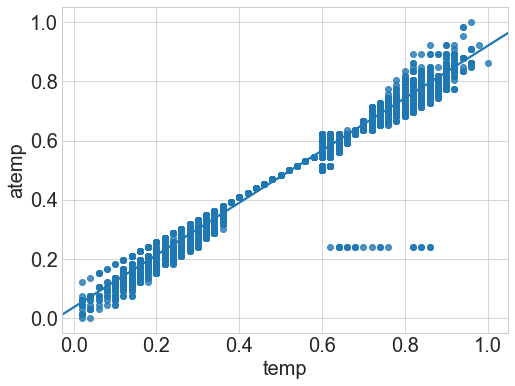

In [22]:
fig = plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.regplot('temp', 'atemp', data=hour_data)

Definitely these two are highly linearly correlated. Thus, we will drop the `atemp` column for conciseness. Besides, the two columns will introduce exhibit multicollinearity in the data.

In [23]:
hour_data = hour_data.drop('atemp', axis=1)

### Climate/weather influence on rental count
### `season`

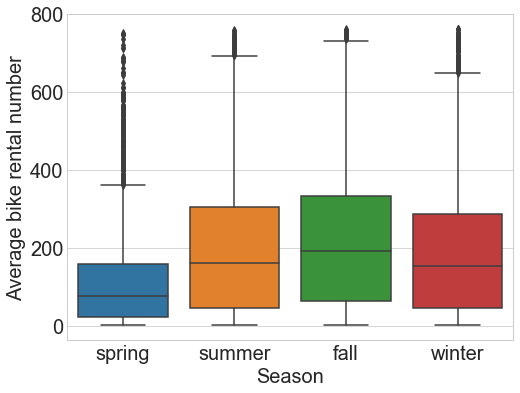

In [24]:
fig = plt.figure(figsize=(8, 6))
sns.boxplot(x='season', y='cnt', data=hour_data)
plt.xlabel('Season')
plt.ylabel('Average bike rental number')
locs, labels = plt.xticks()
# change the labels to the four seasons
plt.xticks(locs, ['spring', 'summer', 'fall', 'winter']);

**Observation:** Rental count is generally low in Winter and it peaks in Summer.
### `month`

Text(0,0.5,'Average bike rental number')

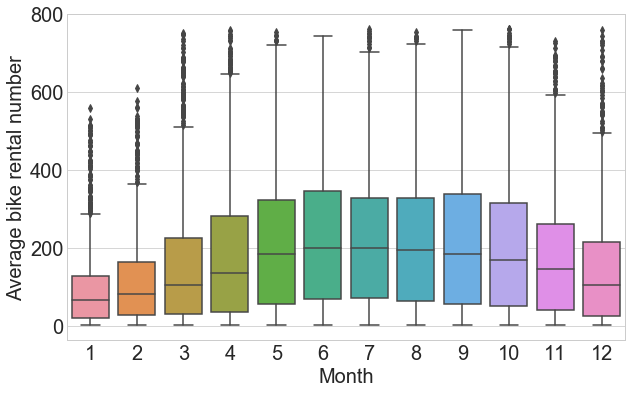

In [25]:
fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='mnth', y='cnt', data=hour_data)
plt.xlabel('Month')
plt.ylabel('Average bike rental number')

**Observation:** same conclusion as `season`. People tend to ride bikes in summer and fall. However, we also see that the data have a large spread.
### `workingday` vs. non-workingday
Here I use a violin plot. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

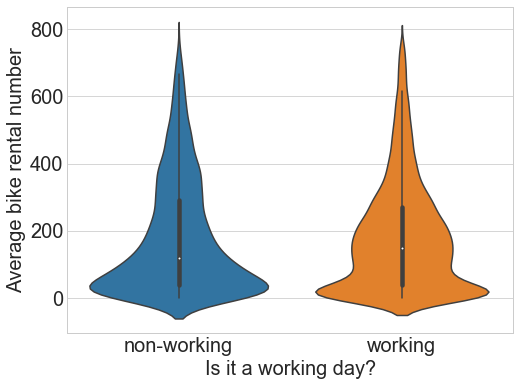

In [26]:
fig = plt.figure(figsize=(8, 6))
sns.violinplot(x='workingday', y='cnt', data=hour_data)
plt.xlabel('Is it a working day?')
plt.ylabel('Average bike rental number')
plt.xticks(plt.xticks()[0], ['non-working', 'working']);  # only change labels, but not locations

Does bike renting change among different days of the week?

In [27]:
# first create a new column to map the weekday number to weekday worlds (abbreviation)
hour_data['weekday_abbr'] = hour_data['weekday'].map({0:'Sun', 1:'Mon', 2:'Tues', 3:'Wed', 4:'Thurs', 5:'Fri', 6:'Sat'})

Text(0,0.5,'Average bike rental number')

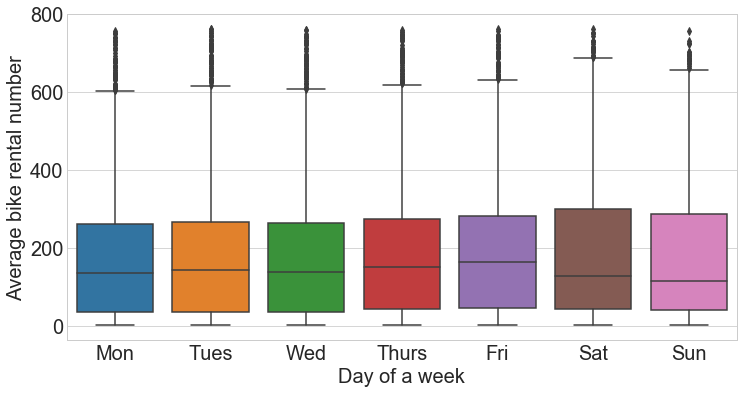

In [28]:
fig = plt.figure(figsize=(12, 6))
sns.boxplot('weekday_abbr', 'cnt', data=hour_data, order=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of a week')
plt.ylabel('Average bike rental number')

**Observations:** 
- To my surprise, there are no visible difference of average number of daily bike rental no matter whether people are working on that day.
- Besides, the rental count doesn't seem to depend on which day it is in a week. 
### `holiday`

In [29]:
print("How many days are holidays in total? ",day_data['holiday'].sum())

How many days are holidays in total?  21


In [30]:
print('How many holidays in each season respectively?\n', 
      day_data.loc[day_data['holiday'] == 1, 'season'].value_counts(sort=False))

How many holidays in each season respectively?
 1    7
2    4
3    4
4    6
Name: season, dtype: int64


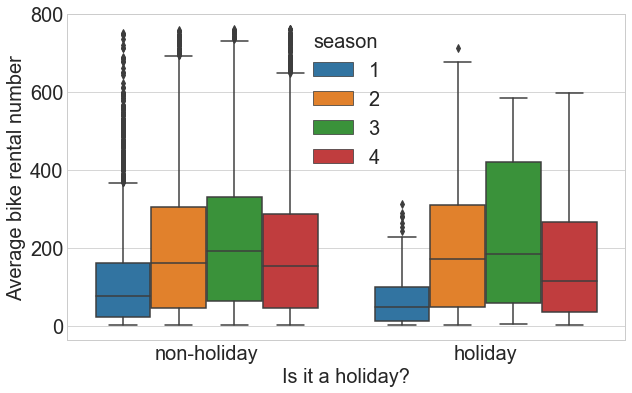

In [31]:
fig = plt.figure(figsize=(10, 6))
sns.boxplot('holiday', 'cnt', data=hour_data, hue='season')
plt.xlabel('Is it a holiday?')
plt.ylabel('Average bike rental number')
locs = plt.xticks()[0]
plt.xticks(locs, ['non-holiday', 'holiday']);

**Observations:**
- Since there only 21 holidays in the dataset, the span of the rental count is smaller than the one of non-holidays.
- No obvious difference of average rental number regarding holidays.
- Only 8 holidays are in summer or fall, when peopel tend to go cycling.

### `hr`: hour of the day

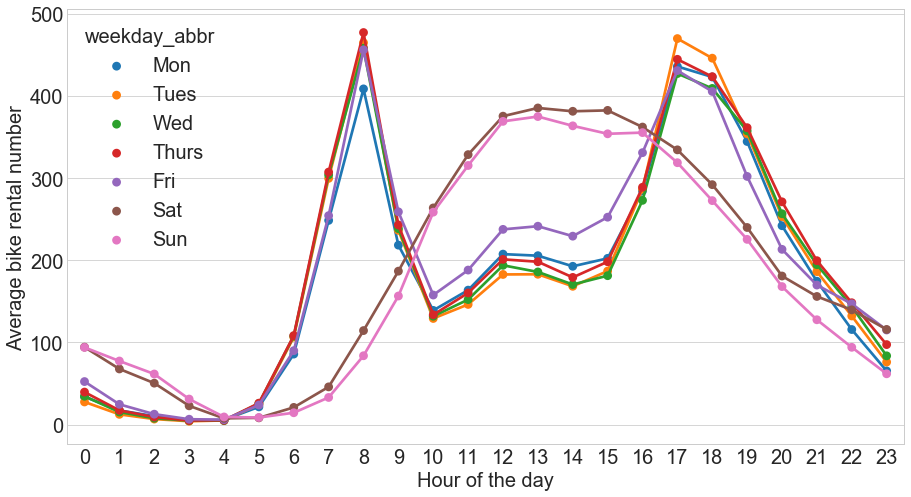

In [32]:
fig = plt.figure(figsize=(15, 8))
sns.pointplot('hr', 'cnt', data=hour_data, hue='weekday_abbr', estimator=np.mean, ci=None,
             hue_order=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Hour of the day')
plt.ylabel('Average bike rental number');

**Observations:**
- Bike rental varies a lot over a day.
- The peak of bike rental occurs at different time depending on weekdays or weekends.

### `weathersit`, `temp` and `hum`: weather condition effects on bike rental
Remember that, in the first section, we notice that for the response variable `cnt`, it is most correlated with `hr`, `temp` and `hum`. 

#### `weathersit`

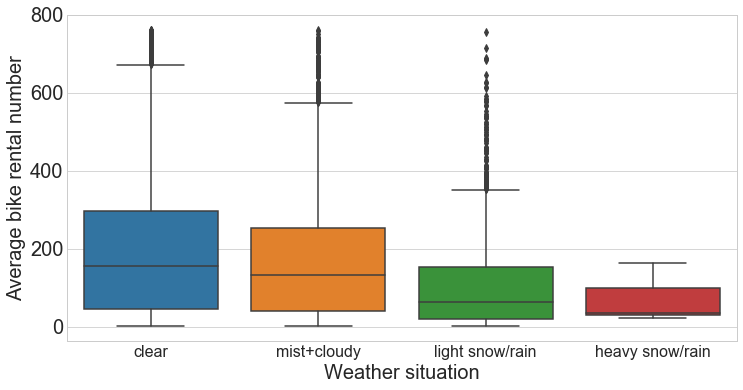

In [33]:
fig = plt.figure(figsize=(12, 6))
sns.boxplot('weathersit', 'cnt', data=hour_data)
plt.xlabel('Weather situation')
plt.ylabel('Average bike rental number')
plt.xticks(plt.xticks()[0], ['clear', 'mist+cloudy', 'light snow/rain', 'heavy snow/rain'], fontsize=16);

In [34]:
print('How many weathersit == 4?', (hour_data['weathersit'] == 4).sum())

How many weathersit == 4? 3


In [35]:
# Since there are only 3 days whose weather situation is 3, we can delete them and treat them as outliers.
hour_data = hour_data[hour_data['weathersit'] != 4]
hour_data.shape

(17158, 16)

#### `temp`

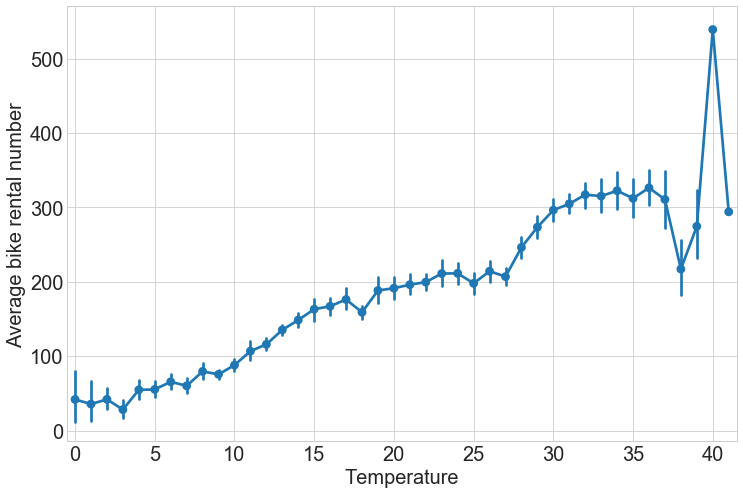

In [36]:
hour_data['temperature'] = (hour_data['temp'] * 41).astype(np.int32)

fig = plt.figure(figsize=(12, 8))
sns.pointplot(x='temperature', y='cnt', data=hour_data, estimator=np.mean)
plt.xlabel('Temperature')
plt.ylabel('Average bike rental number')
# set the ticks and labels on x-axis
locs = np.arange(0, 41, 5)  # locations of each tick
plt.xticks(locs, locs)   # the label on each tick is just the value itself
plt.grid(True)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


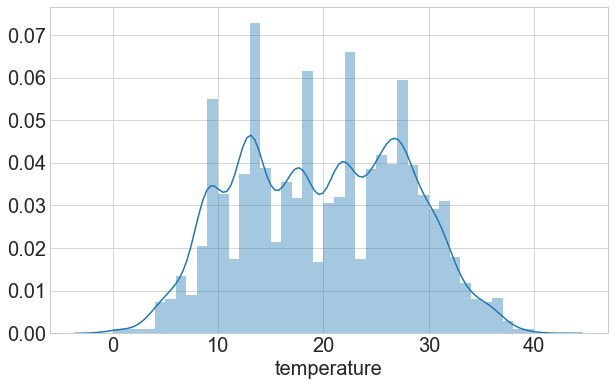

In [37]:
fig = fig = plt.figure(figsize=(10, 6))
sns.distplot(hour_data['temperature'])

In [38]:
print("How many days are there with temperature higher than or equal to 40?", (hour_data['temperature'] >= 40).sum())

How many days are there with temperature higher than or equal to 40? 2


It is highly likely that the days whose temperature >= 40 are outliers. Remove them

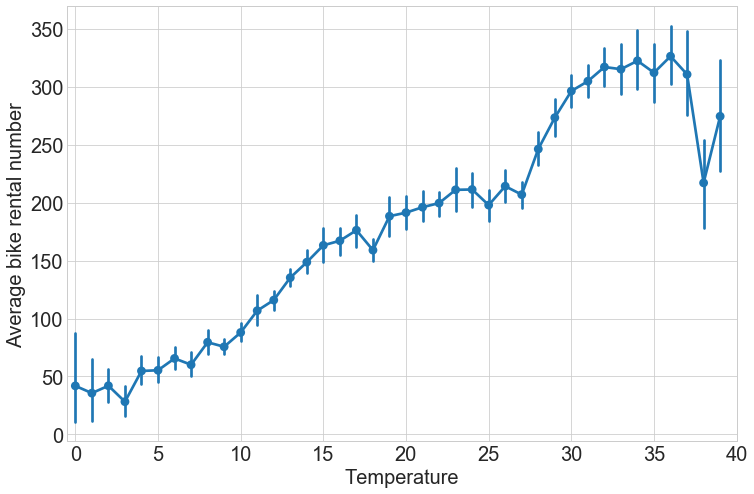

In [39]:
hour_data = hour_data[hour_data['temperature'] < 40]

fig = plt.figure(figsize=(12, 8))
sns.pointplot(x='temperature', y='cnt', data=hour_data, estimator=np.mean)
plt.xlabel('Temperature')
plt.ylabel('Average bike rental number')
# set the ticks and labels on x-axis
locs = np.arange(0, 41, 5)  # locations of each tick
plt.xticks(locs, locs)   # the label on each tick is just the value itself
plt.grid(True)

** Observations **
- Temperature has a great impact on bike rental.
- Generally, the warmer the temperature, the higher bike rental demand, i.e., people like to ride a bike when it is warm enough.

### `hum`: humidity

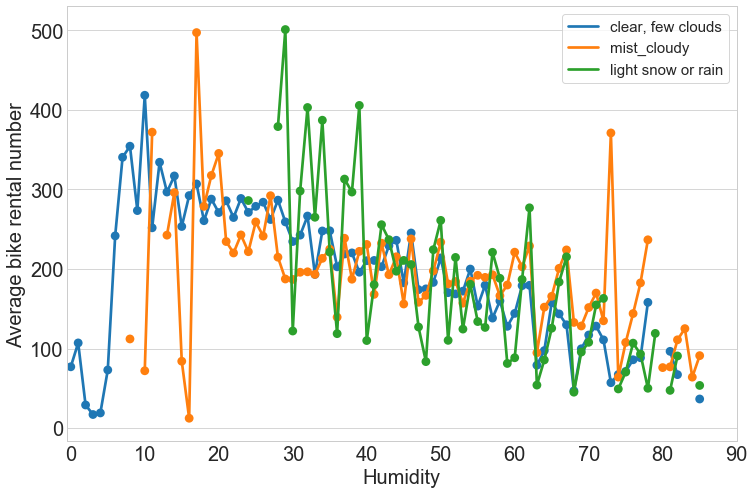

In [40]:
hour_data['humidity'] = (hour_data['hum'] * 100).astype(np.int32)

fig = plt.figure(figsize=(12, 8))
# ci=None: don't show the error bar, otherwise the figure will be totally messy
sns.pointplot(x='humidity', y='cnt', data=hour_data, estimator=np.mean, ci=None, hue='weathersit')
plt.xlabel('Humidity')
plt.ylabel('Average bike rental number')
# adjust the x ticks
locs = np.arange(0, 91, 10)
plt.xticks(locs, locs)    # the 2nd parameter 'labels' here uses the same value as `locs`
plt.legend(['clear, few clouds', 'mist_cloudy', 'light snow or rain'], loc='best', fontsize=15, frameon=True);

**Observations**:
- It is reasonable that in light snow or rain conditions, there are no low-humidity records.
- The bike rental demand tends to increase if the humidity decreases. 

**`hum` vs.`weathersit`**: how are humidity correlated with weather types?  
I suspsect that humidity affects people's cycling behavior mainly because it is raining/snowing.

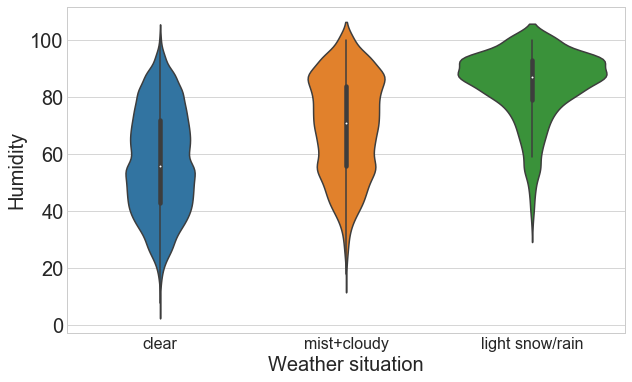

In [41]:
fig = plt.figure(figsize=(10, 6))
sns.violinplot('weathersit', 'humidity', data=hour_data)
plt.xlabel('Weather situation')
plt.ylabel('Humidity')
plt.xticks(plt.xticks()[0], ['clear', 'mist+cloudy', 'light snow/rain', 'heavy snow/rain'], fontsize=16);

It seems there is a wide distribution of humidity even in clear, few clouds days. As for snowy/rainy periods, it is our common sense that the humidity is concentrated around a high value.

### `windspeed`

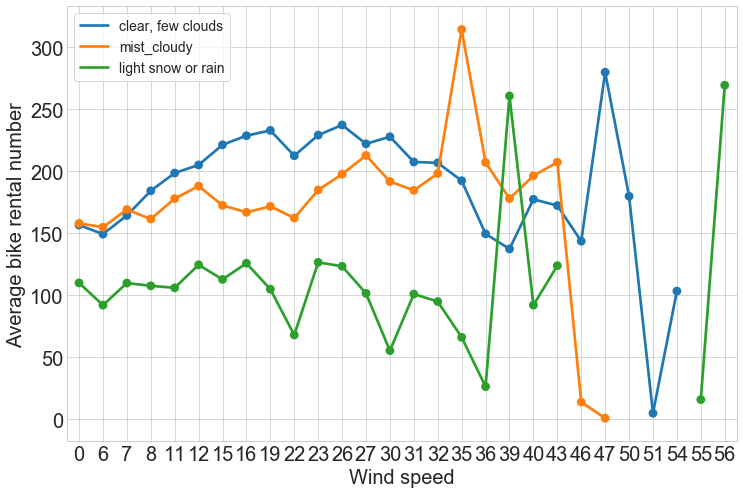

In [50]:
hour_data['windspeedvalue'] = (hour_data['windspeed'] * 67).astype(np.int32)

fig = plt.figure(figsize=(12, 8))
# ci=None: don't show the error bar, otherwise the figure will be messy
sns.pointplot(x='windspeedvalue', y='cnt', data=hour_data, estimator=np.mean, ci=None, hue='weathersit')
plt.xlabel('Wind speed')
plt.ylabel('Average bike rental number')
plt.legend(['clear, few clouds', 'mist_cloudy', 'light snow or rain'], loc='best', fontsize=14, frameon=True);
plt.grid(True)

** Observations:**  
- There is no obvious influence of wind speed on bike rental, as long as the weather is good, i.e., clear or partly cloudy days.
- Only fierce winds with a speed $>= 40$ will prohibit people from cycling, which is reasonable and intuitive.

### `casual` vs. `registered` users
How do these two classes of users contribute to the total count?

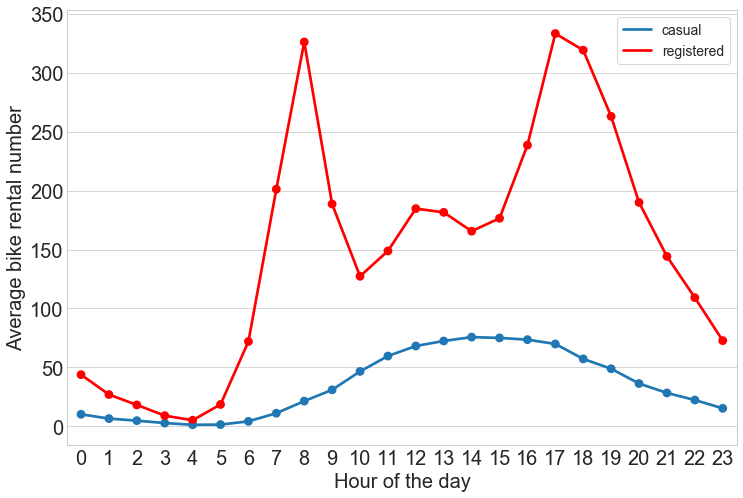

In [43]:
fig = plt.figure(figsize=(12, 8))
sns.pointplot('hr', 'casual', data=hour_data, estimator=np.mean, ci=None,
             hue_order=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
sns.pointplot('hr', 'registered', data=hour_data, estimator=np.mean, ci=None,
             hue_order=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], color='r')
plt.xlabel('Hour of the day')
plt.ylabel('Average bike rental number')
plt.legend(['casual', 'registered'], fontsize=14, frameon=True)

** Observations:**
- The main proportion of bike rental is contributed by registered users.
- The peak rental count of registered users happen around 7AM-9AM and 5PM-7PM. This is resonable and can be attributed to regular school and office commuters.
- Casual users tend to rent bikes int the afternoon, from 12AM to 5PM.

### Is there any difference between year 2011 and 2012?
We hope that the business is expanding.

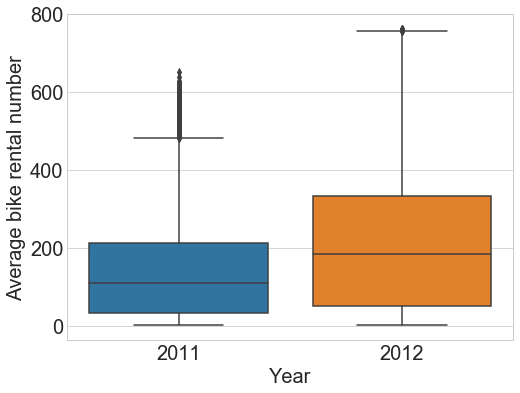

In [44]:
fig = plt.figure(figsize=(8, 6))
sns.boxplot('yr', 'cnt', data=hour_data)
plt.xlabel('Year')
plt.ylabel('Average bike rental number')
plt.xticks(plt.xticks()[0], ['2011', '2012']);

**Observation:** we can see that the rental business has expanded and there are on average an increasing amount of bike rental in year 2012, which may indicate that the market is still not saturated.

## Conclusion of EDA
- `temp` (temperature) and `hr` (hour of the day) are the two most significant factors that impact bike rental.
- `hum` (humidity) also affects the bike rental demand, though its impact is not as large as the one of `temp` and `hr`.
- On weekdays, people tend to rent a bike to go to the work place or school: the two peaks arise when people get to work and get off work.
- At weekends, there are no sharp peaks of bike rental. By contrast, people will cycle during the whole afternoon.
- The are many more rental counts from the registered users than the casual users.

# 5. Feture Engineering & Modeling
Despite the fact that it is not required to build a predictive model to predict the `cnt` (rental count) variable using the other features, I believe performing some basic modeling is a good way to validate what we have found from EDA.  
That is, if the factors we identifed such as `temp`, `hr` and `hum` are really influential, they should possess certain predictive power and high feature importance. 

In [44]:
# let's see what features we have got now after such a long journey of EDA
hour_data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'weekday_abbr', 'temperature', 'humidity',
       'windspeedvalue'],
      dtype='object')

## Feature selection: remove redundant or useless features
we have created some features manually above to facilitate data exploration. Now we can remove them as well as other useless features, which we have identified through previous EDA.  It is well known that feature selection can help enhance generalization of models by reducing variance (overfitting) [2].
*Note:*
- There are more systematic methods to perform feature selection, for example, those reviewed in the paper[3]. 
- Here we only try to select useful features intuitively and empirically according the results of EDA.

In [45]:
remove_features = ['dteday', 'workingday', 'casual', 'registered', 
                 'weekday_abbr','temperature', 'humidity', 'windspeedvalue']
hour_data = hour_data.drop(remove_features, axis=1)
hour_data.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit',
       'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## One-hot encoding for categorical variables
Most machine learning models cannot handle categorical values directly, for example, linear regression and SVM. A common scheme to encode categorical features is one-hot encoding.  
It should be noted though in this dataset `hour_data` apparently all values are numbers, some of them are indeed categorical since they don't have intrinsic ordering, like `weathersit` and `yr`. See [reference](https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/).

However, in the next we will use the random forest model, which can handle categorical data naturally, and we thereby don't perform one-hot encoding here.

## Skewed distribution of `cnt`: log transformation
Most models work best with data close to normal distribution. Let's check the distribution of `cnt` (rental count) values first using density plot and kernel density estimation.

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


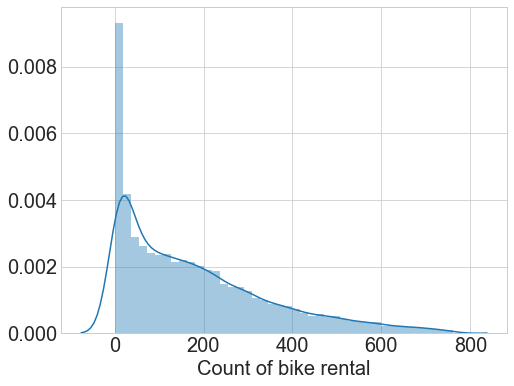

In [51]:
fig = plt.figure(figsize=(8, 6))
sns.distplot(hour_data['cnt'])
plt.xlabel('Count of bike rental');

Obviously, the distribution of `cnt` is severely skewed to the right. The log transformation is widely used to reduce skewness[4]. Let's try it.

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


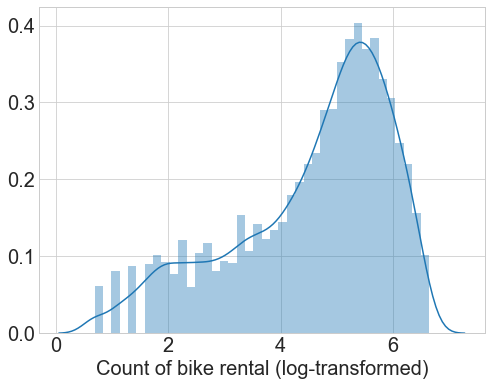

In [52]:
# numpy.log1p: log(x + 1) because x may be zero here
fig = plt.figure(figsize=(8, 6))
sns.distplot(np.log1p(hour_data['cnt']))
plt.xlabel('Count of bike rental (log-transformed)');

After log transformation, the data distribution is still skewed a little but is much better than the original one.

Add the log-transformed count as a new column `logcnt`, which will act as the true response variable.

In [53]:
hour_data['logcnt'] = np.log1p(hour_data['cnt'])
print('Shape of hour data for final prediction: ', hour_data.shape)

Shape of hour data for final predication:  (17156, 20)


## Data partition: training set and test set
It is widely known in machine learning community that we should use a *training set* to train our model, while depending on a separate *test set* to evaluate the model's performance.  
In this study, since I don't take these data as time series, the `hour_data` is simply divided randomly into two subsets: `hour_train_data` containing 75% of the whole data and `hour_test_data` composed of the remaining data.

In [49]:
# control the random state
np.random.seed(123)
import random
random.seed(123)

In [55]:
from sklearn.model_selection import train_test_split
# treat each year separately: each year data is divided into 3:1 for training and test
hour_train_data0,hour_test_data0 = train_test_split(hour_data[hour_data['yr'] == 0], train_size=0.75)
hour_train_data1,hour_test_data1 = train_test_split(hour_data[hour_data['yr'] == 1], train_size=0.75)
# sklearn models accept np.array. Thus, pandas.DataFrame.values will yield the corresponding np.array.
train_X = np.vstack([hour_train_data0.drop(['cnt', 'logcnt'], axis=1).values, 
                             hour_train_data1.drop(['cnt', 'logcnt'], axis=1).values])
train_y = np.hstack([hour_train_data0['logcnt'].values, hour_train_data1['logcnt'].values])
test_X = np.vstack([hour_test_data0.drop(['cnt', 'logcnt'], axis=1).values, 
                    hour_test_data1.drop(['cnt', 'logcnt'], axis=1).values])
test_y = np.hstack([hour_test_data0['logcnt'].values, hour_test_data1['logcnt'].values])

features = hour_train_data0.columns.drop(['cnt', 'logcnt'])
print('Features for prediction:\n', features.values)
print('Training set size: ', train_X.shape[0])
print('Test set size: ', test_X.shape[0])

Features for prediction:
 ['dteday' 'season' 'yr' 'mnth' 'hr' 'holiday' 'weekday' 'workingday'
 'weathersit' 'temp' 'hum' 'windspeed' 'casual' 'registered'
 'weekday_abbr' 'temperature' 'humidity' 'windspeedvalue']
Training set size:  12866
Test set size:  4290


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Random forest regression
A random forest is just an ensemble of decision trees, which can be used both for regression and classification. I choose random forest here because it is widely used in industry with robust good performance, and because it has few parameters requried to be tuned. The other reason is that random forest has a built-in mechanism for automatic feature selection during model construction and can quantify the importance of each feature [6].     
Since this task doesn't focus on prediction, I won't try more advanced and complicated models here like *xgboost* and neural networks. 

### Evaluation metric: Root Mean Squared Logarithmic Error (RMSLE) 
Since the dependent variable `cnt` is severely skewed, it is better to adopt the RMSLE metric, as follows [5].

In [51]:
def rmsle(p, a):
    """
    p: array, log-transformed predicted output
    a: array, log-transformed actual output
    """
    return np.sqrt(np.mean((p - a) ** 2))

### Train a model: use *grid search* to tune parameters automatically
We mainly tune three hyperparameters:
- n_estimators (number of trees)
- max_features: number of features for each splitting

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [800, 1000, 1200],
              'max_features': [8, 9, 10]}
 
gs = GridSearchCV(RandomForestRegressor(), param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
gs.fit(train_X, train_y)
model = gs.best_estimator_
print('Training set best RMSLE in 10-fold CV: ', np.sqrt(-gs.best_score_))
print('Corresponding best parameters: ', gs.best_params_)

Training set best RMSLE in 10-fold CV:  0.3346451306499018
Corresponding best parameters:  {'max_features': 9, 'n_estimators': 1200}


### Predict and test

In [53]:
pred_y = model.predict(test_X)
print('Test set RMSLE: ', rmsle(pred_y, test_y))

Test set RMSLE:  0.325028412606362


### Feature importance
One useful characteristic of a random forest model is that is can perform automatic feature selection and evaluate the predictive importance of each feature.
Let's inspect the significance of each feature on predicting the model output, i.e., `cnt` (count of bike rental).

In [56]:
importance = pd.Series(model.feature_importances_, index=features)
importance = importance.sort_values(ascending=False)  # sort in descending order
printmd('**Feature importance obtained by random forest')
print(importance)

**Feature importance obtained by random forest

hr            0.721813
weekday       0.081852
temp          0.080708
yr            0.025578
hum           0.024179
season        0.020190
mnth          0.014814
weathersit    0.012752
windspeed     0.011941
holiday       0.006172
dtype: float64


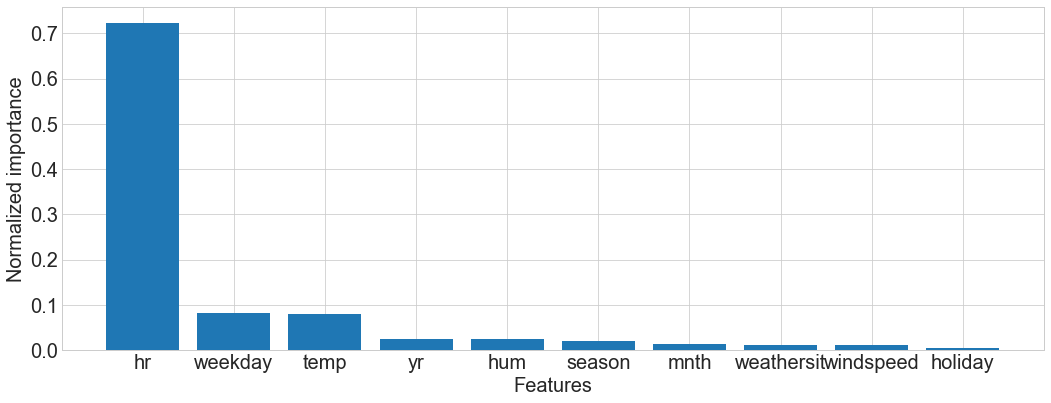

In [68]:
fig = plt.figure(figsize=(15, 6))
plt.bar(importance.index, importance.values, width=0.8)
plt.xlabel('Features')
plt.ylabel('Normalized importance')  # sum of all importance is 1
plt.tight_layout()

## Summary
- With a simple random forest model and no complex feature engineering, the RMSLE is about 0.347 for training set with 10-fold cross validation and 0.325 for the separate test set, indicating that the features we have chosen are indeed predictive.
- The evaluation scores, i.e., RMSLE, on the training set (10-fold CV) and test set are quite close, which shows that **the random forest model doesn't overfit the training set**. In other words, the mode we trained can generalize very well.
- By comparing the feature importance obtained from the random forest model, it is clear that ** the most important features are `hr`, `temp` and `weekday`. Such quantifed importances conforms with our observations in the previous EDA part **. Their individual feature importances are
    - `hr` (hour of the day): 0.72
    - `weekday` (day of the week): 0.08
    - `temp` (temperature): 0.08
- Particularly, the `hr` (hour of the day) feature has a paramount importance for predicting the hourly bike rental number. This is reasonable, since we have seen large flunctuations of bike rental demand over a day in EDA, especially on weekdays.

# 6. Conclusion

## The most important factors on bike rental demand
In this notebook, detailed exploratory data analysis (EDA) and preliminary modeling work are presented. We can conclude that the most important factors that have impact on the demend of bike sharing service are
- `hr`: hour of a day
- `temp`: temperature
- `weekday`: day of a week.

## Possible incentive schemes to promote bike sharing accoding to data analysis
The significances of the above factors is first highlighted by EDA and then demonstrated quantitatively using the feature importance metric of a random forest regression model. Thus, to propose an effective incentive scheme, we should pay much attention to the above important factors, for example, 
- Since during week days, bike rental shows peak and non-peak hours. To promote the bike rental during non-peak hours, we can introduce **dynamic pricing**. Dynamic pricing, also referred to as surge pricing, demand pricing, or time-based pricing, is a pricing strategy in which businesses set flexible prices based on current market demands. Businesses are able to change prices based on algorithms that take into account supply and demand, and other external factors in the market. During non-peak hours, the price should be brought down to attract more users.

- Less users rent bikes when temperature is lower. **During winter and spring, to increase the usage of bike, it is suggested to make more promotion and charge users at some discount**. At the same time, the bike service provider may also limit the supply of available bikes to lower the depreciable cost, since much fewer users rent bikes compared to that of in summer and fall. 

- Since there are many more rental counts from the registered users than the casual users, we should find a way to convert casual users into registered users. **Giving free-ride promotion to newly registered users can attract users to register**.

- On snowy and rainy days, few people ride bike. Corresponding infrastructure should be constructed to ensure the usage of bike. More cycling facilities, including dedicated cycling paths and accessible bike racks, are also needed. A typical example of such infrastructure demand appears in Singapore, which rains frequently due to its tropical climate. Therefore, the shelters, similar to the covered sidewalks, should be built above the most heavily used cycling paths to facilitate cycling [7]. 

- Rental business has expanded and there is on average an increasing amount of bike rental in year 2012, which may indicate that the market is still not saturated. Thus, in year 2013, the bike sharing operators may consider to increase the bike supply. At the same time, keep making promotion and thereby enlarging the user base.

- Other possible incentive plans. For instance, shall we make a promotion at weekends? Because there are no noticeable peaks at weekends from the figure in EDA.

# Reference
[1] Kelleher, John D., Brian Mac Namee, and Aoife D'Arcy. Fundamentals of machine learning for predictive data analytics: algorithms, worked examples, and case studies. MIT Press, 2015.

[2] James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. An introduction to statistical learning. Vol. 112. New York: springer, 2013.

[3] Guyon, Isabelle, and André Elisseeff. "An introduction to variable and feature selection." Journal of machine learning research 3, no. Mar (2003): 1157-1182.

[4] Changyong, F. E. N. G., W. A. N. G. Hongyue, L. U. Naiji, C. H. E. N. Tian, H. E. Hua, and L. U. Ying. "Log-transformation and its implications for data analysis." Shanghai archives of psychiatry 26, no. 2 (2014): 105.

[5] Desai, Kalpit V., and Roopesh Ranjan. "Insights from the Wikipedia Contest (IEEE Contest for Data Mining 2011)." arXiv preprint arXiv:1405.7393 (2014).

[6] Breiman, Leo. "Random forests." Machine learning 45, no. 1 (2001): 5-32.

[7] Shen, Yu, Xiaohu Zhang, and Jinhua Zhao. "Understanding the usage of dockless bike sharing in Singapore." International Journal of Sustainable Transportation (2018): 1-15.